This notebook follows from the notebook `grib_test__FOR_20250110_two_ERA5_datasets.ipynb`

Read the GRIB file.

In [20]:
import pygrib
# msgs = pygrib.open("0120.grib")
# msgs = pygrib.open("0122.grib")
# msgs = pygrib.open("0124.grib")
msgs = pygrib.open("0125.grib")

In [21]:
for msg in msgs[1:5]:
    print(msg)

1:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010000
2:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010600
3:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001011200
4:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001011800


In [22]:
import numpy as np
ts_spatialAvgTemp = np.array([]) # time series of temperatures after spatial averaging
msgs.rewind()
for msg in msgs:
    # ts_spatialAvgTemp = np.append(ts_spatialAvgTemp, msg["values"].flatten().mean())
    ts_spatialAvgTemp = np.append(ts_spatialAvgTemp, msg.values.max())
    
# import matplotlib.pyplot as plt
# plt.plot(ts_spatialAvgTemp)

Maximize over each year:

([<matplotlib.axis.XTick at 0x1e9e6c2cb10>,
 [Text(0, 0, '1940'),
  Text(5, 0, '1950'),
  Text(10, 0, '1960'),
  Text(15, 0, '1970'),
  Text(20, 0, '1980'),
  Text(25, 0, '1990'),
  Text(30, 0, '2000'),
  Text(35, 0, '2010'),
  Text(40, 0, '2020')])

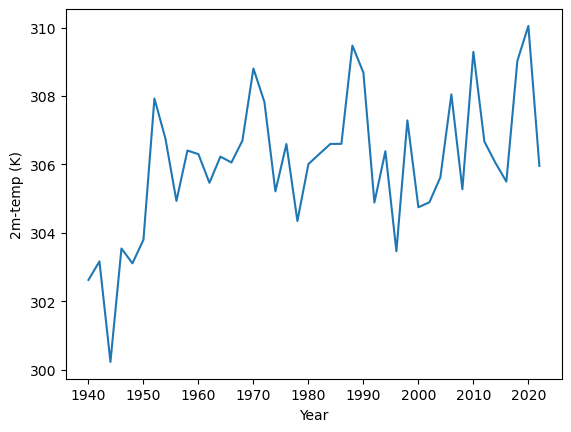

In [23]:
# N = 4*16*12 # number of timepoints in each year; for 0120, 0122 datasets
# N = 8*16*12 # for 0124 dataset
N = 4*15*12 # for 0125 dataset

# N_years = 24 # number of years; for 0120, 0124 datasets
# N_years = 48 # for 0122 dataset
N_years = 43 # for 0125 dataset

ts_annualMaxSpatialAvgTemp = np.array([]) # first average over the whole space, then maximize over each year

for y in range(0, N_years-1): 
    ts_annualMaxSpatialAvgTemp = np.append(
        ts_annualMaxSpatialAvgTemp, 
        ts_spatialAvgTemp[y*N:(y+1)*N].max())
    
import matplotlib.pyplot as plt
plt.plot(ts_annualMaxSpatialAvgTemp)
plt.xlabel("Year")
plt.ylabel("2m-temp (K)")

# for 0120, 0124 datasets, set the x-axis to be year 2001, 2002, ..., 2024, but only show every 5 years
# plt.xticks(np.arange(0, N_years-1, 5), np.arange(2001, 2024, 5))

# for 0122 dataset, set the x-axis to be year 1977, 1978, ..., 2024, but only show every 5 years
# plt.xticks(np.arange(0, N_years-1, 5), np.arange(1977, 2024, 5))

# for 0125, set the x-axis to be year 1940, 1942, ..., 2024, but only show every decade
plt.xticks(np.arange(0, N_years-1, 5), np.arange(1940, 2024, 10))


In [24]:
ts_annualMaxSpatialAvgTemp

array([302.62397766, 303.16601562, 300.22819519, 303.54336548,
       303.10908508, 303.79763794, 307.9256897 , 306.75415039,
       304.93251038, 306.40585327, 306.29980469, 305.46327209,
       306.228302  , 306.05639648, 306.69628906, 308.80293274,
       307.82592773, 305.21264648, 306.5958252 , 304.34643555,
       306.00895691, 306.30732727, 306.59854126, 306.60142517,
       309.4730072 , 308.68359375, 304.88638306, 306.38519287,
       303.46188354, 307.28686523, 304.74832153, 304.89245605,
       305.625     , 308.04702759, 305.27320862, 309.29125977,
       306.66957092, 306.04899597, 305.49780273, 309.02539062,
       310.0473938 , 305.95783997])

In [25]:
msgs.close()

In [26]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.flatten().mean(), a.flatten().max()

(3.5, 6)